In [61]:
import numpy as np
import pandas as pd

In [62]:
housing = pd.read_csv('housing.csv')

In [63]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [64]:
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [65]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [66]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [67]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [68]:
%matplotlib inline
import matplotlib.pyplot as plt

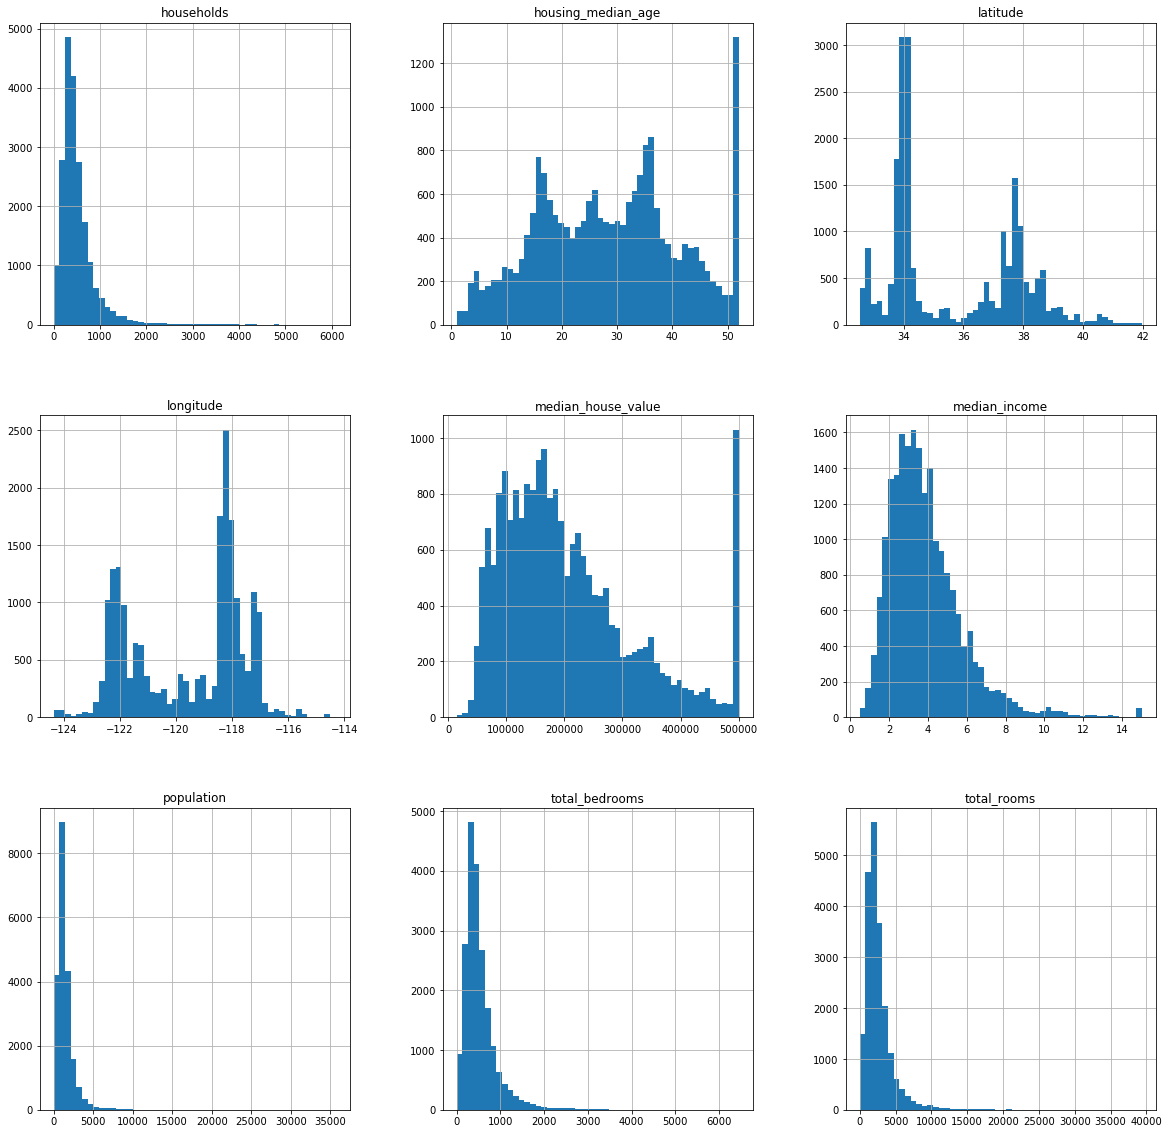

In [69]:
housing.hist(bins = 50, figsize=(20,20))
plt.show()

In [70]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

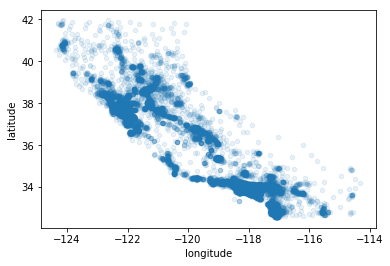

In [71]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

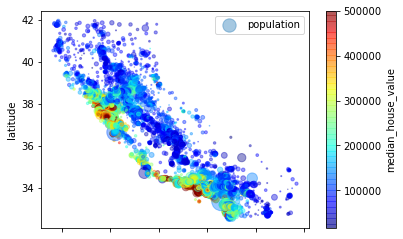

In [72]:
housing.plot(kind="scatter", x="longitude", y ="latitude", alpha=0.4, s=housing["population"]/100, 
label="population", c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

# Finding Correlation

In [73]:
corr_matrix = housing.corr()

In [74]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [75]:
corr_matrix["population"].sort_values(ascending=False)

population            1.000000
households            0.907222
total_bedrooms        0.877747
total_rooms           0.857126
longitude             0.099773
median_income         0.004834
median_house_value   -0.024650
latitude             -0.108785
housing_median_age   -0.296244
Name: population, dtype: float64

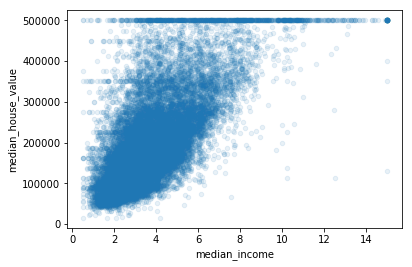

In [76]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [77]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [78]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853


In [79]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

In [80]:
corr_matrix = housing.corr()
corr_matrix["population"].sort_values(ascending=False)

population             1.000000
households             0.907222
total_bedrooms         0.877747
total_rooms            0.857126
longitude              0.099773
bedrooms_per_room      0.035319
median_income          0.004834
median_house_value    -0.024650
rooms_per_household   -0.072213
latitude              -0.108785
housing_median_age    -0.296244
Name: population, dtype: float64

# Preparing DATA for ML Algorithm

In [81]:
housing.dropna(subset=["total_bedrooms"])  ## Drops the rows with no values/data under only the column "total_bedrooms"
median = housing["total_bedrooms"].median()  ## Median value of that particular column
housing["total_bedrooms"].fillna(median)   ## Fills the median values where there are null values in that column

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
5         213.0
6         489.0
7         687.0
8         665.0
9         707.0
10        434.0
11        752.0
12        474.0
13        191.0
14        626.0
15        283.0
16        347.0
17        293.0
18        455.0
19        298.0
20        184.0
21        367.0
22        541.0
23        337.0
24        437.0
25        123.0
26        244.0
27        421.0
28        492.0
29        160.0
          ...  
20610     484.0
20611     441.0
20612     289.0
20613     365.0
20614     460.0
20615     216.0
20616     441.0
20617     109.0
20618     247.0
20619     340.0
20620      41.0
20621     247.0
20622     147.0
20623     244.0
20624     300.0
20625      17.0
20626     184.0
20627      65.0
20628     421.0
20629    1856.0
20630     505.0
20631     493.0
20632     416.0
20633     412.0
20634     395.0
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, dt

# Handling Text and Categorical attributes

* Transformers
* fit is used to train the model (estimators)
* fit_transform to be used for transformers (Eg : Label Encoder to convert string to numbers)

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [84]:
housing_cat_encoded

array([3, 3, 3, ..., 1, 1, 1], dtype=int64)

In [85]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)

In [86]:
housing['OP'] = housing_cat_encoded  ### Ocean Proximity in numbers

In [87]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
longitude              20640 non-null float64
latitude               20640 non-null float64
housing_median_age     20640 non-null float64
total_rooms            20640 non-null float64
total_bedrooms         20433 non-null float64
population             20640 non-null float64
households             20640 non-null float64
median_income          20640 non-null float64
median_house_value     20640 non-null float64
ocean_proximity        20640 non-null object
rooms_per_household    20640 non-null float64
bedrooms_per_room      20433 non-null float64
OP                     20640 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 2.0+ MB


In [88]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,OP
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,3


In [89]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [90]:
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

In [91]:
housing_cat_encoded.reshape((-1,1))

array([[3],
       [3],
       [3],
       ..., 
       [1],
       [1],
       [1]], dtype=int64)

In [92]:
housing_cat_1hot.toarray() 

### Basically 1 hot encoder represents the feature in the form of boolean output 
### Here since the ocean_proximity has 5 different values of strings, O/P is based on the index of appearance.

array([[ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.]])

In [93]:
encoder.get_params

<bound method BaseEstimator.get_params of OneHotEncoder(categorical_features='all', dtype=<class 'numpy.float64'>,
       handle_unknown='error', n_values='auto', sparse=True)>

# Custom Transformers

* Custom cleanup operation
* Combining spefic attributes
* Transformer should have a fit_transform() function implemented
* The transformer class should extend BaseEstimator(base class) to TransformerMixin
* If you want set_params() & get_params(), extend BaseExtimator class
* np_c - This adds more columns to dataframe

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin

In [95]:
rooms_ix, bedrooms_ix, population_ix, househiold_ix = 3,4,5,6

In [96]:
class CombinedAttributesAddr(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:,rooms_ix] / X[:, househiold_ix]
        population_per_household = X[:, population_ix] / X[:, househiold_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix] 
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAddr(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [97]:
housing_extra_attribs.shape

(20640, 15)

In [98]:
housing.values.shape

(20640, 13)

In [99]:
attr_adder = CombinedAttributesAddr(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [100]:
housing_extra_attribs.shape

(20640, 16)

# Select and Train the model

In [101]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# Transformation Pipeline

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,Imputer, LabelBinarizer

Some estimators (such as an imputer) can also transform a dataset; these are called transformers. Once again, the API is quite simple: the transformation is performed by the transform() method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for an imputer.

Scikit-Learn provides a handy class to take care of missing values: Imputer. Here is how to use it. First, you need to create an Imputer instance, specifying that you want to replace each attribute’s missing values with the median of that attribute:

In [103]:
num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),  ## Replaces with median values
        ('attribs_adder', CombinedAttributesAddr()), ## Custom made Attribute adder
        ('std_scaler', StandardScaler()), 
    ])

In [104]:
housing_num = housing.drop("ocean_proximity", axis=1) ### Drops the string values under "ocean_proximity"

## Contains numerical values for all 

In [105]:
print (housing_num.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   rooms_per_household  bedrooms_per_room  OP  
0             6.984127           0.146591   3  
1             6.238137           0.155797   3  
2             8.2881

In [106]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

## Numerical fit transform for the set containing only numbers

In [107]:
housing_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -0.04959654, -1.02998783],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.09251223, -0.8888972 ],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -0.02584253, -1.29168566],
       ..., 
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
        -0.0717345 ,  0.02113407],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
        -0.09122515,  0.09346655],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
        -0.04368215,  0.11327519]])

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', LabelBinarizer()),
    ])

In [109]:
encoder = LabelBinarizer()

In [110]:
housing_cat_1hot = encoder.fit_transform(housing_cat)

In [111]:
housing_cat_1hot

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [112]:
housing_cat

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
5        NEAR BAY
6        NEAR BAY
7        NEAR BAY
8        NEAR BAY
9        NEAR BAY
10       NEAR BAY
11       NEAR BAY
12       NEAR BAY
13       NEAR BAY
14       NEAR BAY
15       NEAR BAY
16       NEAR BAY
17       NEAR BAY
18       NEAR BAY
19       NEAR BAY
20       NEAR BAY
21       NEAR BAY
22       NEAR BAY
23       NEAR BAY
24       NEAR BAY
25       NEAR BAY
26       NEAR BAY
27       NEAR BAY
28       NEAR BAY
29       NEAR BAY
           ...   
20610      INLAND
20611      INLAND
20612      INLAND
20613      INLAND
20614      INLAND
20615      INLAND
20616      INLAND
20617      INLAND
20618      INLAND
20619      INLAND
20620      INLAND
20621      INLAND
20622      INLAND
20623      INLAND
20624      INLAND
20625      INLAND
20626      INLAND
20627      INLAND
20628      INLAND
20629      INLAND
20630      INLAND
20631      INLAND
20632      INLAND
20633      INLAND
20634     

In [113]:
from sklearn.pipeline import FeatureUnion

### Feature Union in order to merge the pipelines of different data types

In [114]:
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline), 
    ("cat_pipeline", cat_pipeline),])

In [115]:
housing_prepared = full_pipeline.fit_transform(housing)

ValueError: could not convert string to float: 'INLAND'

In [116]:
cat_pipeline.fit_transform(housing).shape ### Categorical Pipeline

(20640, 5)

In [117]:
num_pipeline.fit_transform(housing_num).shape  ## Numerical Pipeline

(20640, 15)

In [120]:
housing_prepared = np.hstack([cat_pipeline.fit_transform(housing),num_pipeline.fit_transform(housing_num)])

In [121]:
lin_reg = LinearRegression()

In [122]:
lin_reg.fit(housing_prepared, housing['median_house_value']) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Performance Metrics

In [123]:
from sklearn.metrics import mean_squared_error

In [124]:
housing_prediction = lin_reg.predict(housing_prepared)

In [125]:
lin_mse = mean_squared_error(housing['median_house_value'], housing_prediction)

In [126]:
lin_mse

6.773196094794526e-18

In [127]:
np.sqrt(lin_mse)

2.6025364732880357e-09

In [128]:
housing_prediction

array([ 452600.,  358500.,  352100., ...,   92300.,   84700.,   89400.])

In [129]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning
# Every model requires some initial parameters, how do you find the best params

In [130]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [131]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

In [132]:
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error')

## Negative MSE scoring

In [133]:
grid_search.fit(housing_prepared,housing['median_house_value'])

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [134]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [135]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [137]:
grid_search.best_score_ 


### Because of Negative MSE

-22875594.444560885

# Trying the same for RandomizedSearchCV

In [138]:
from sklearn.model_selection import RandomizedSearchCV

In [139]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [140]:
rand_CV = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

In [141]:
rand_CV.fit(housing_prepared,housing['median_house_value'])

AttributeError: 'list' object has no attribute 'values'